# Neural Artistic Style Transfer

This interactive notebook shows how to use the python package `style` for performing artistic style transfer between a source and a style image. 

Based on the work of
```
Gatys, L. A., Ecker, A. S., & Bethge, M. (2015). 
A neural algorithm of artistic style. 
https://arxiv.org/abs/1508.06576
```

Also incorporating ideas from

```
Johnson, J., Alahi, A., & Fei-Fei, L. (2016, October). 
Perceptual losses for real-time style transfer and super-resolution. 
In European Conference on Computer Vision (pp. 694-711). Springer, Cham.
https://arxiv.org/abs/1603.08155
```

In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import torch
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)

Import style package

In [25]:
import style
st = style.IteratedStyleTransfer()

### Visualizing Style Transfer

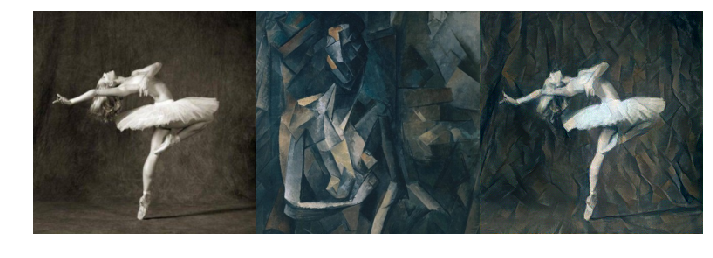

In [74]:
p = style.image.open('etc/dancing.jpg')
a = style.image.open('etc/picasso.jpg')
p = style.image.resize(p, (256,256))
a = style.image.resize(a, (256,256))

# Make sure we all see the same
#torch.manual_seed(456)

# choose layers for content and style loss computation
c_id = st.conv_ids[12]

style_weights = np.zeros(len(st.conv_ids))
style_weights[[6,8,12]] = 1

# get a generator object
g = st.iterate(p, a, c_id, style_weights, niter=500, lr=1e-2, x=p);

# and iterate (yields every 50 iterations)
fig, ax = plt.subplots()
img = ax.imshow(np.zeros_like(p))
ax.set_axis_off()

for x, l in g:
    print(l)
    clear_output(wait=True)
    print(x.shape)
    img.set_data(x)
    display(fig)
clear_output(wait=True)

plt.imshow(np.hstack((p,a,x)))
plt.axis('off')
plt.show()

## Multiscale

100%|████████████████████████████████████| 4/4 [00:35<00:00,  9.60s/it, loss=[2.040e-02 1.189e-02 8.512e-03 2.801e-06]]


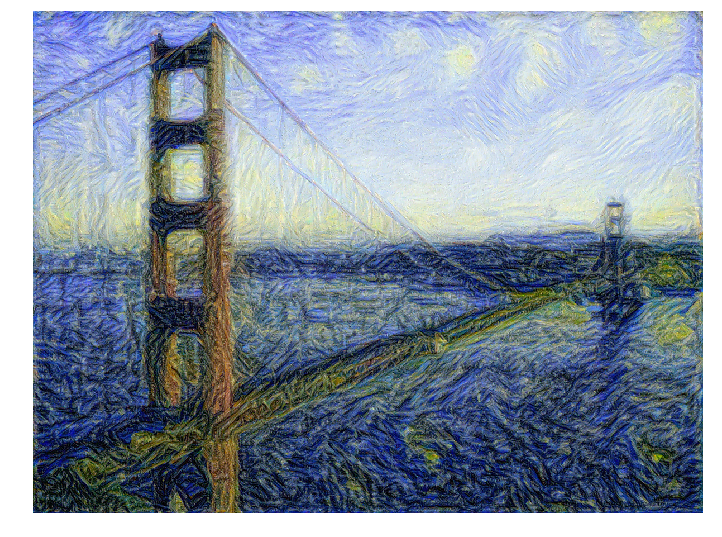

In [78]:
p = style.image.open('etc/bridge.JPG')
a = style.image.open('etc/vangogh.jpg')

sizes = style.image.ImagePyramid.get_sizes(p.shape[:2][::-1], 4)
cid = st.conv_ids[8]

style_weights = np.zeros(len(st.conv_ids))
style_weights[[4,8,12]] = [1, 0.2, 0.2]

imgs = []
for x,_ in st.iterate_multiscale(p, a, cid, style_weights, sizes, x=p, niter=100):
    imgs.append(x)

imgs = [style.image.resize(img, sizes[-1]) for img in imgs]
data = np.hstack(imgs)
style.image.save('style.png', data)
plt.imshow(imgs[-1])
plt.axis('off')
plt.show()    